In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage as linkage
from scipy.cluster.hierarchy import dendrogram as dendrogram
from sklearn.decomposition import PCA
import sklearn.metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv').copy()
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
X = df.drop('country', axis = 1)
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


<Axes: >

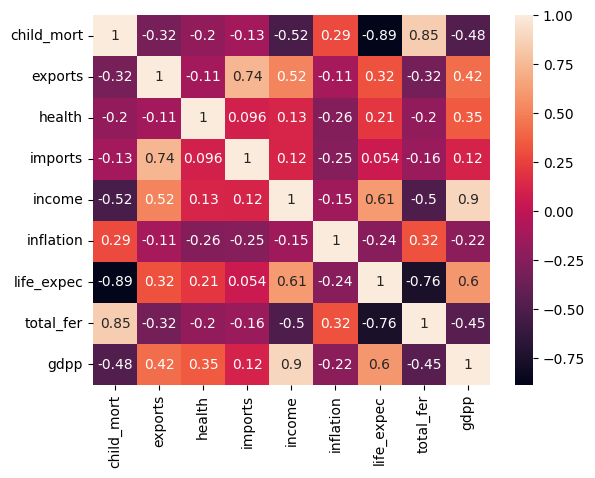

In [4]:
sns.heatmap(X.corr(), annot = True)

c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


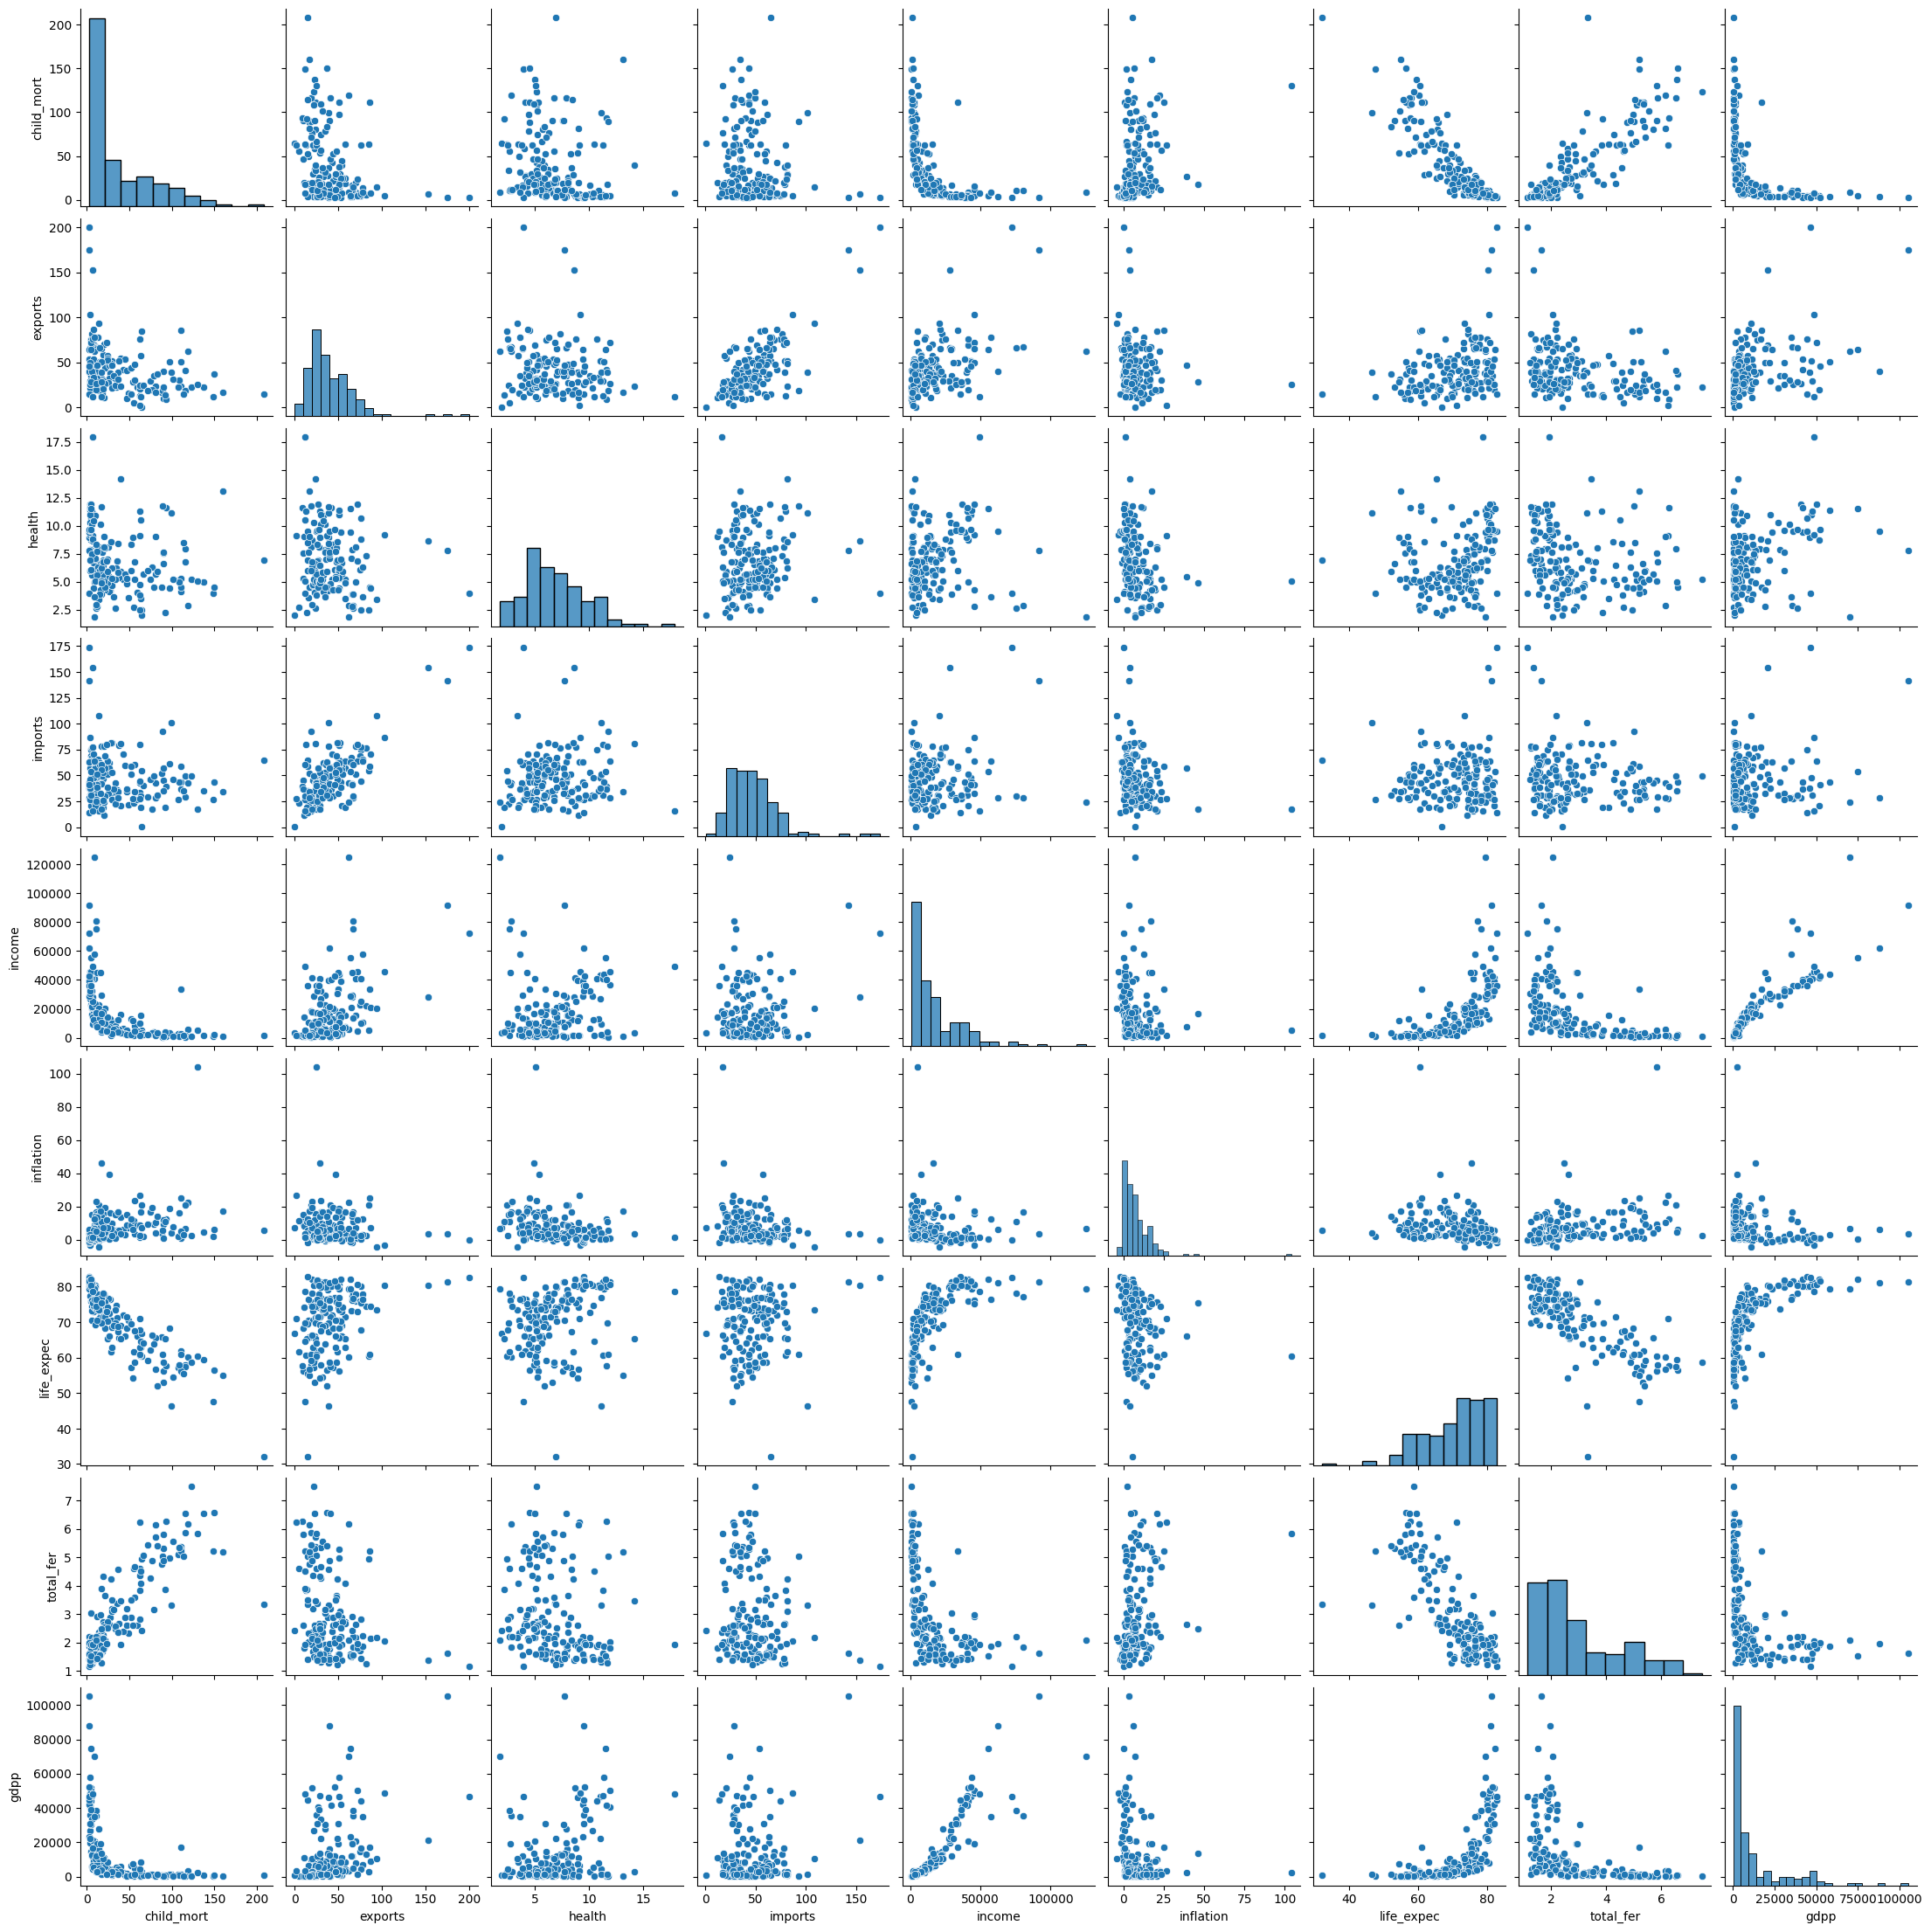

In [5]:
sns.pairplot(X)

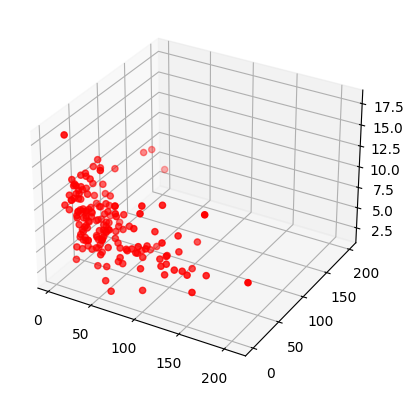

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c='r')

In [7]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

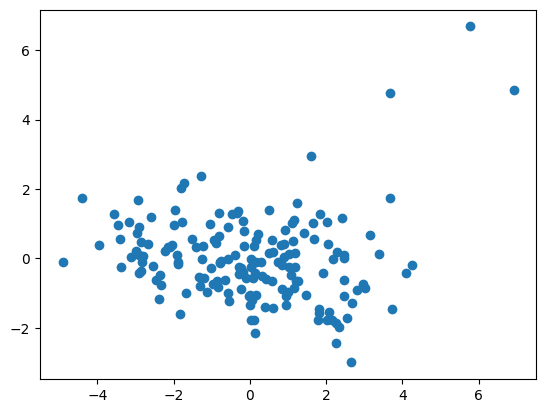

In [9]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Using Elbow Method

In [10]:
wcss = []

for k in range(1, 10):
    k_means = KMeans(n_clusters = k, init = 'k-means++', random_state = 101)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

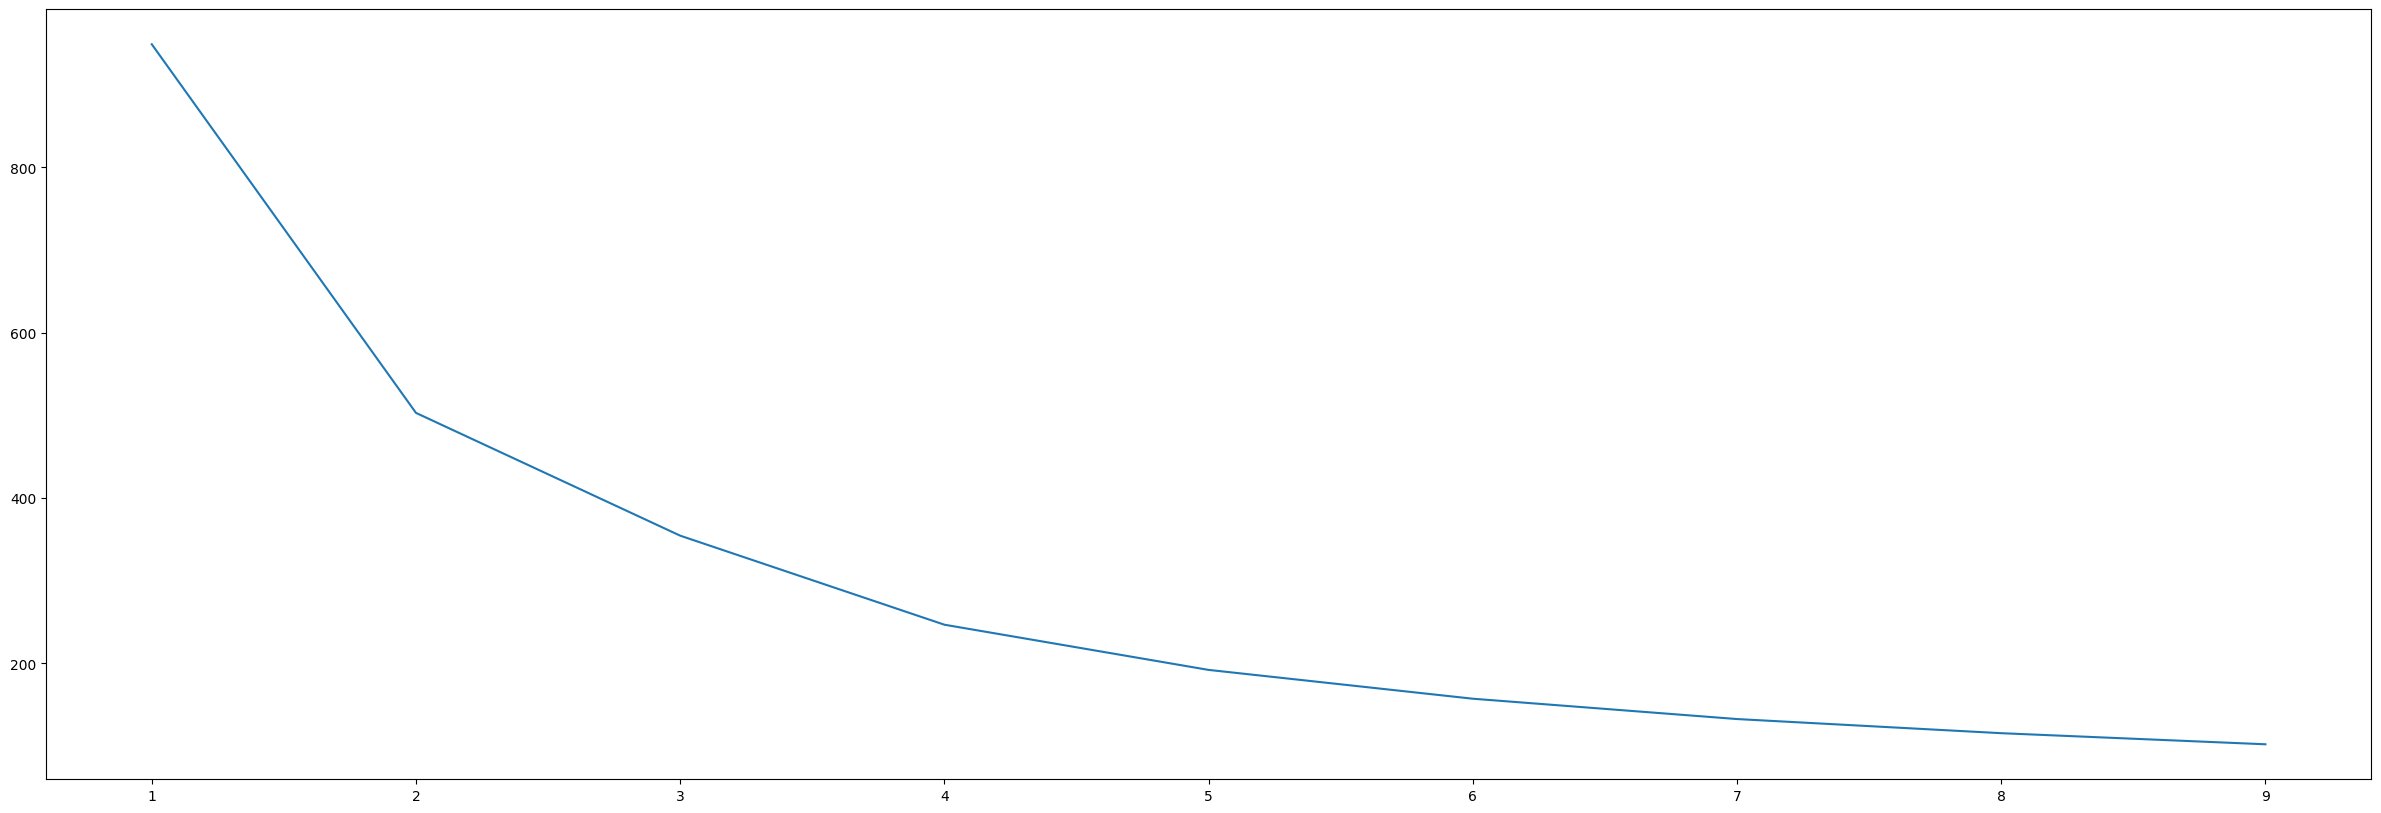

In [11]:
plt.figure(figsize = (30, 10))
plt.plot(range(1, 10), wcss)

K = 3

Using Silhouette Method

In [12]:
for k in range(2, 10):
    k_means = KMeans(n_clusters = k, init = 'k-means++', random_state = 101)
    k_means_predict = k_means.fit_predict(X)
    print(f"Silhouette Score for k = {k} is: {sklearn.metrics.silhouette_score(X, k_means_predict)}")

c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Silhouette Score for k = 2 is: 0.4155229083787261
Silhouette Score for k = 3 is: 0.44249722382762446
Silhouette Score for k = 4 is: 0.3898564748495469
Silhouette Score for k = 5 is: 0.3820636406980114
Silhouette Score for k = 6 is: 0.3654794795102818
Silhouette Score for k = 7 is: 0.36487192951923264
Silhouette Score for k = 8 is: 0.3526922306699328
Silhouette Score for k = 9 is: 0.3430066677819179


c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K = 3

In [13]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 101)
k_means_fit = k_means.fit(X)
k_means_predict = k_means_fit.predict(X)
k_means_predict

c:\Users\yaver\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

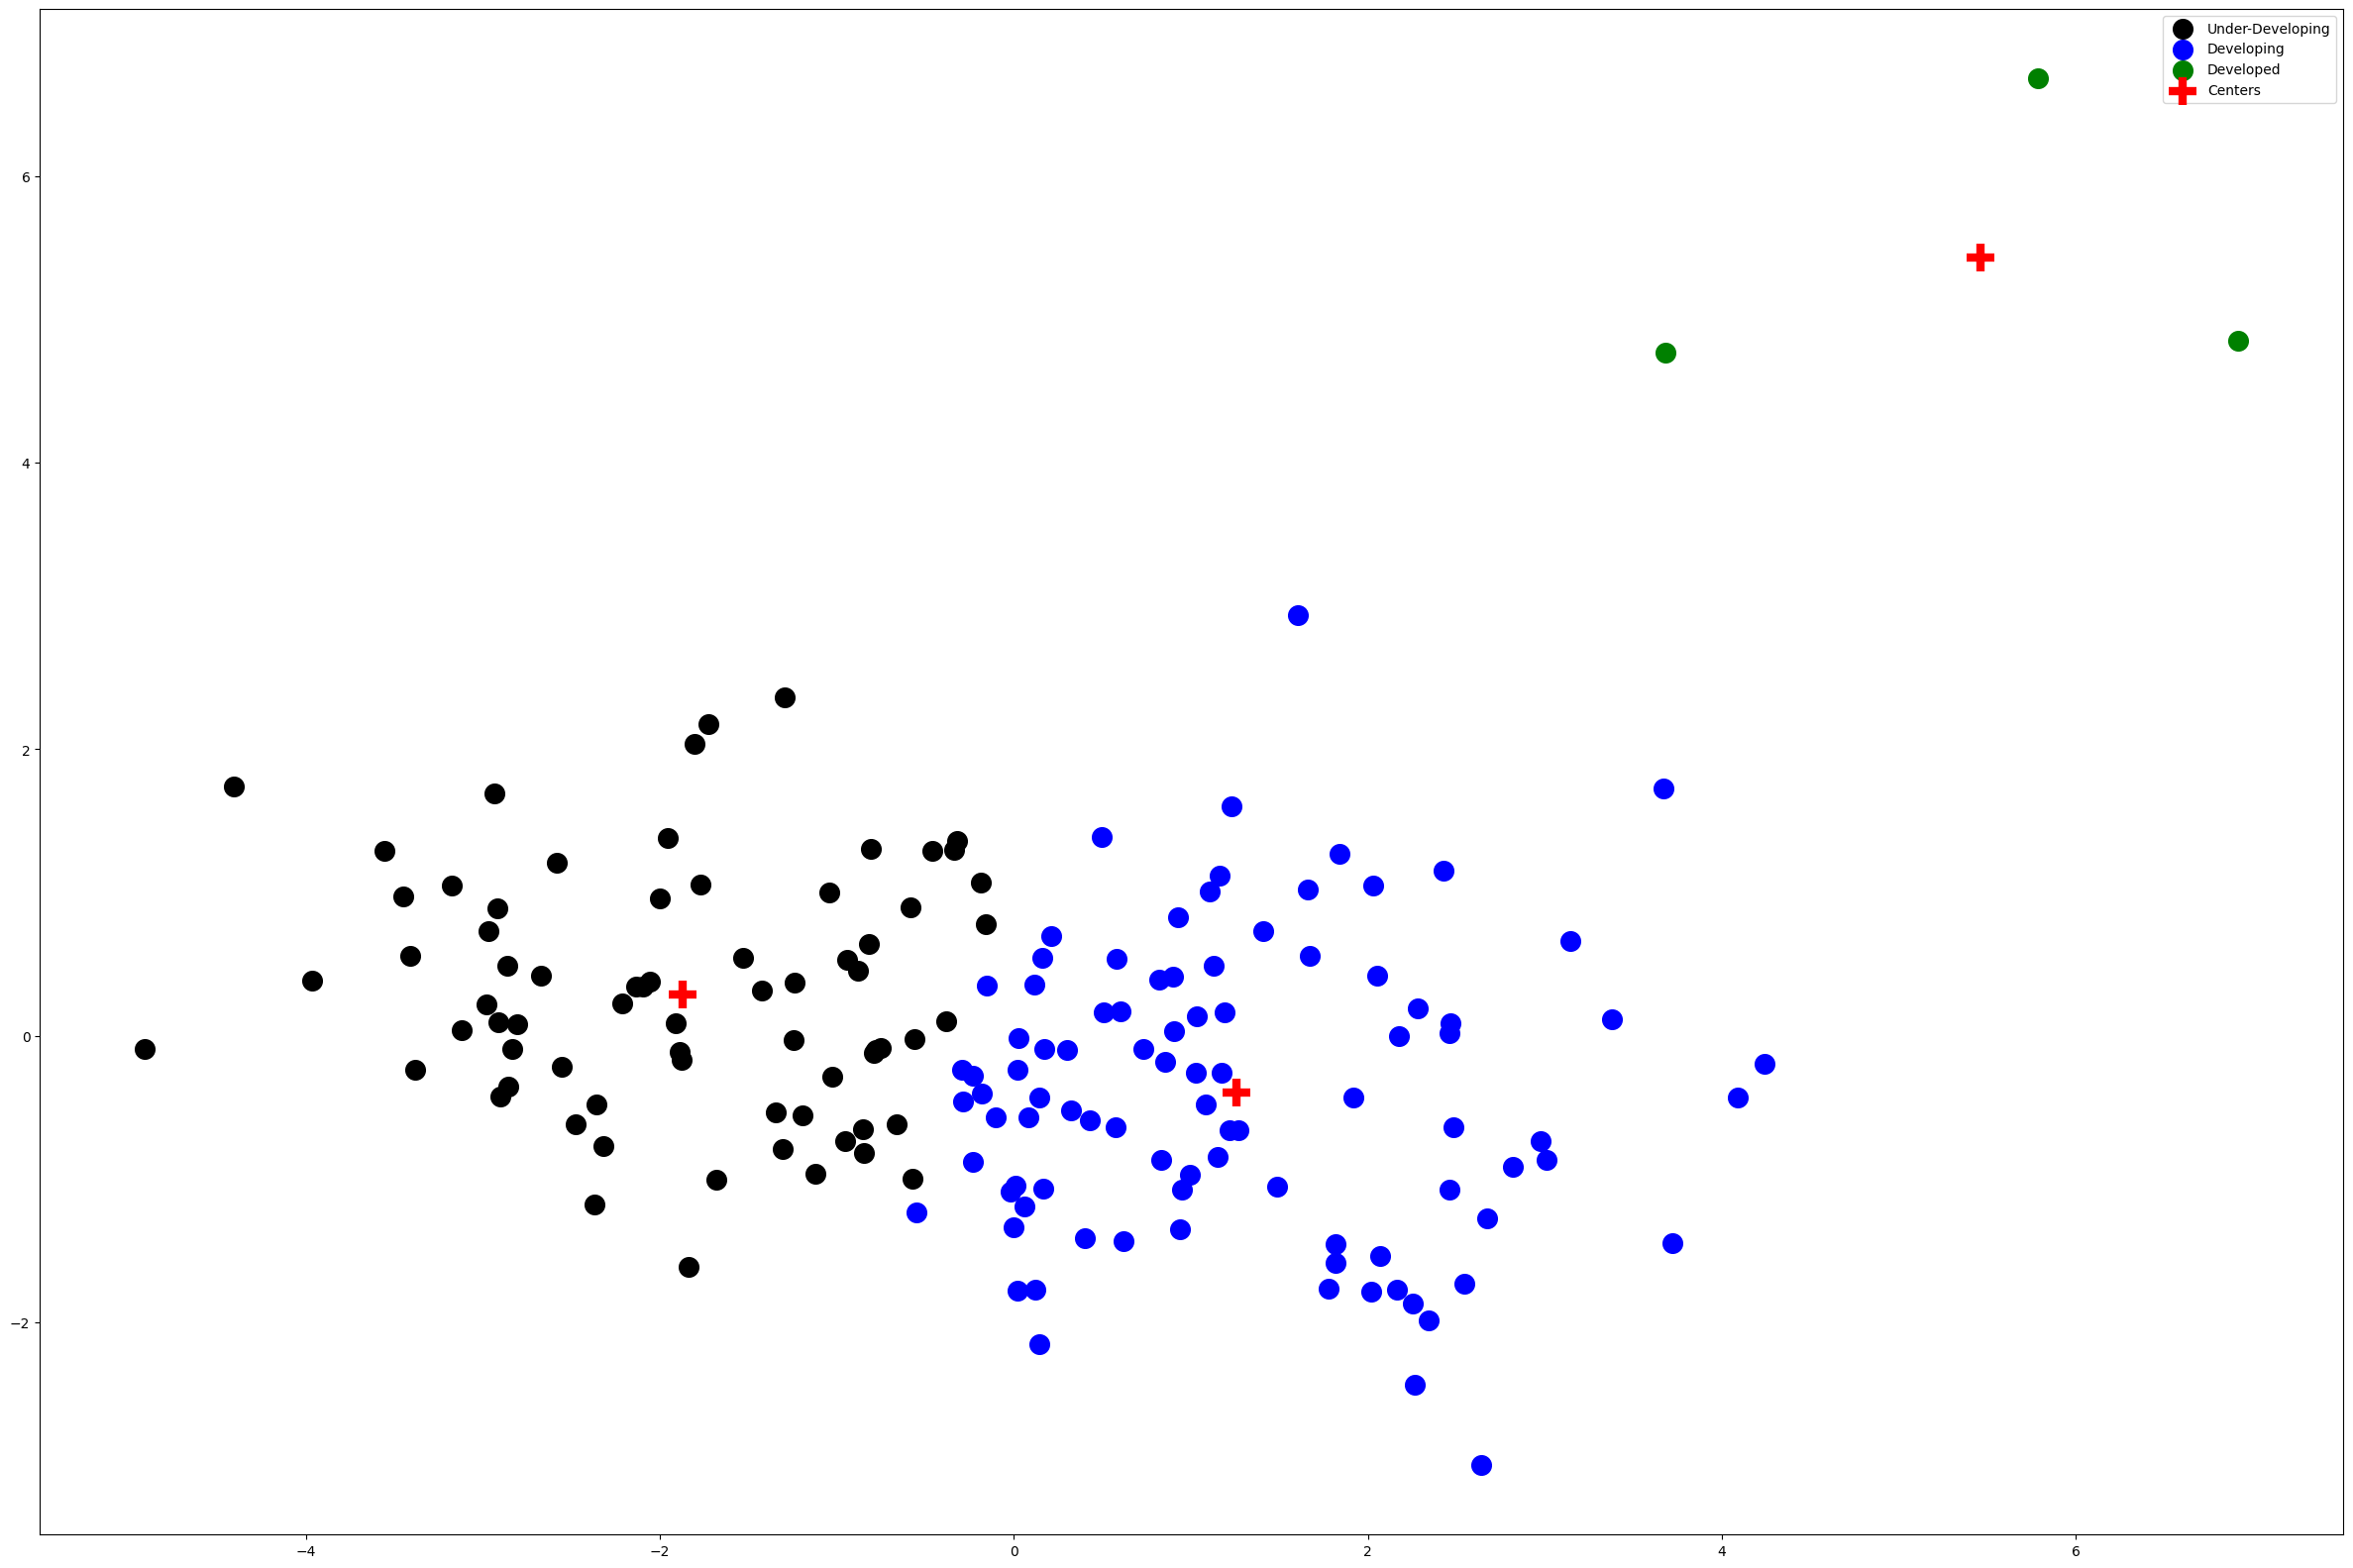

In [14]:
plt.figure(figsize = (30, 20))
plt.scatter(X[k_means_predict == 0, 0], X[k_means_predict == 0, 1], c = 'black', s = 200, label = 'Under-Developing')
plt.scatter(X[k_means_predict == 1, 0], X[k_means_predict == 1, 1], c = 'blue', s = 200, label = 'Developing')
plt.scatter(X[k_means_predict == 2, 0], X[k_means_predict == 2, 1], c = 'green', s = 200, label = 'Developed')
plt.scatter(k_means_fit.cluster_centers_[:, 0], k_means_fit.cluster_centers_[:, 1], marker = '+', c = 'red', s =400, label = 'Centers', linewidths = 6)
plt.legend()
plt.show()

In [15]:
df['KMeans Clustering'] = k_means_predict

Hierarchical Clustering

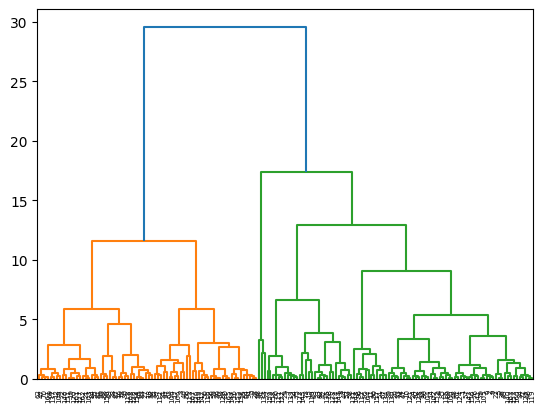

In [16]:
merg = linkage(X, method = 'ward')
dendrogram(merg)
plt.show()

As it can be seen from the Dendogram (K) = 3

In [17]:
hierarchy = AgglomerativeClustering(n_clusters = 3)
hierarchy_predict = hierarchy.fit_predict(X)

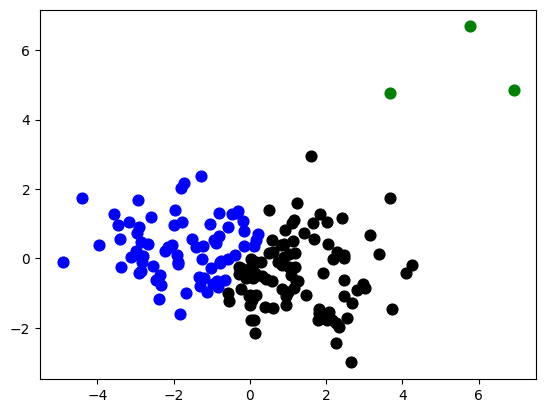

In [18]:
plt.scatter(X[hierarchy_predict == 0, 0], X[hierarchy_predict == 0, 1], c = 'black', s = 60, label = 'Under-Developing')
plt.scatter(X[hierarchy_predict == 1, 0], X[hierarchy_predict == 1, 1], c = 'blue', s = 60, label = 'Developing')
plt.scatter(X[hierarchy_predict == 2, 0], X[hierarchy_predict == 2, 1], c = 'green', s = 60, label = 'Developed')
plt.show()

In [19]:
df['Hierarchical Clustering'] = hierarchy_predict

In [20]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans Clustering,Hierarchical Clustering
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,1


In [21]:
df['Hierarchical Clustering']

0      1
1      0
2      0
3      1
4      0
      ..
162    1
163    0
164    0
165    1
166    1
Name: Hierarchical Clustering, Length: 167, dtype: int64